In [4]:
# Load NeuroKit and other useful packages
# Install NeuroKit with pip install neurokit2 in notebook: pip install neurokit2

import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns

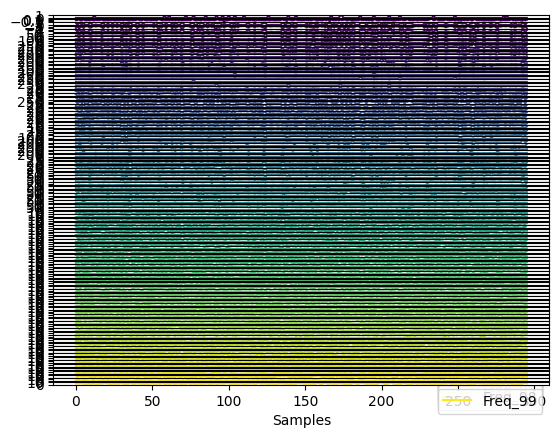

In [ ]:
import ast

# Alternate heart rate and noise levels
ecg50 = nk.ecg_simulate(duration=10, noise=0.05, heart_rate=50)
ecg100 = nk.ecg_simulate(duration=10, noise=0.01, heart_rate=100)

# Visualize
ecg_df = pd.DataFrame({"ECG_100": ecg100, "ECG_50": ecg50})

X = pd.read_csv('Collected_data.csv')
Input = X.drop(columns=[
	'bottle',
	'vibration_index_red',
	'fill_level_grams_red',
	'vibration_index_blue',
	'fill_level_grams_blue',
	'vibration_index_green',
	'fill_level_grams_green',
	'final_weight',
	'temperature_green',
	'temperature_red',
	'temperature_blue'
])

def extract_features(row):
    values = np.array(ast.literal_eval(row['drop_oscillation']), dtype=float)
    features = {
        'is_cracked': row['is_cracked'],
        'mean': np.mean(values),
        'std': np.std(values),
        'min': np.min(values),
        'max': np.max(values),
    }
    # Fourier-Features hinzufügen
    fft_values = np.abs(np.fft.fft(values))
    for i in range(1, 100):
        features[f'Freq_{i}'] = fft_values[i]
    return pd.Series(features)

df = Input.apply(extract_features, axis=1)

nk.signal_plot(df, subplots=True)

In [84]:
## make a dataframe with the mean and standard deviation of the ECG signals

#df = pd.DataFrame(data).T
#df["Mean"] = df["EGK"].apply(np.mean)
#df["STD"] = df["EGK"].apply(np.std)
df.head()

,is_cracked,mean,std,min,max,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,...,Freq_90,Freq_91,Freq_92,Freq_93,Freq_94,Freq_95,Freq_96,Freq_97,Freq_98,Freq_99
0,0.0,0.000711,1.616877,-3.688064,4.044351,9.026527,1.911221,28.871533,41.888923,442.520567,...,2.102177,5.305897,5.782536,4.416721,5.465814,4.583790,2.517441,8.749174,3.055810,3.699214
1,0.0,0.017293,0.210139,-0.929097,1.014815,8.672827,2.003062,2.199794,6.685556,2.865079,...,2.817214,3.357098,2.518176,6.627423,2.582014,4.450280,5.467616,2.202905,8.179827,5.066572
2,0.0,0.092904,1.494137,-4.013566,3.461273,54.356553,60.609940,97.610285,398.143471,197.644113,...,3.798462,6.246507,9.057448,5.633752,1.662143,9.985566,6.161779,9.158634,7.235774,4.047564
3,0.0,-0.022916,1.161705,-2.501115,2.536096,8.658795,14.662078,13.465582,17.435591,106.536336,...,3.777891,5.343292,2.710249,3.513932,1.127748,1.577706,0.633247,4.808803,1.803923,4.013259
4,0.0,-0.016876,0.243702,-0.860038,1.124162,8.114437,4.359801,5.534953,3.451165,1.491512,...,2.093702,3.863150,9.241941,3.805386,3.880014,5.245191,3.918191,6.369036,4.326353,7.785384


<Axes: xlabel='is_cracked', ylabel='max'>

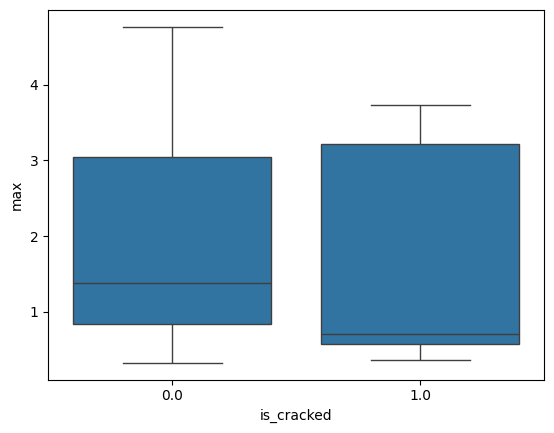

In [53]:
# make a boxplot of the mean of the ECG signals

sns.boxplot(x="is_cracked", y="max", data=df)

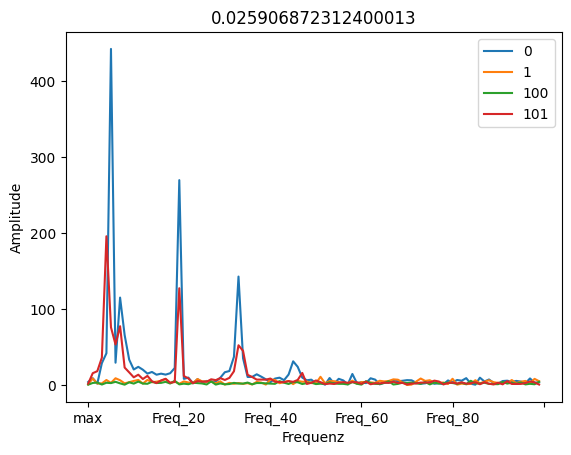

In [87]:
# Make a plot for the Frequencies of the first ECG signal

for id in [0,1,100,101]:

    plt = df.iloc[id, 4:].plot()
    plt.set_title(df.iloc[id, 1])
    plt.set_xlabel("Frequenz")
    plt.set_ylabel("Amplitude")
    plt.legend()


In [92]:
# Melt the DataFrame so that we have a column for the cracked status and the frequency

df_melted = pd.melt(df, id_vars=["is_cracked"], value_vars=df.columns[4:])
df_melted.head()

,is_cracked,variable,value
0,0.0,max,4.044351
1,0.0,max,1.014815
2,0.0,max,3.461273
3,0.0,max,2.536096
4,0.0,max,1.124162


<Axes: xlabel='variable', ylabel='value'>

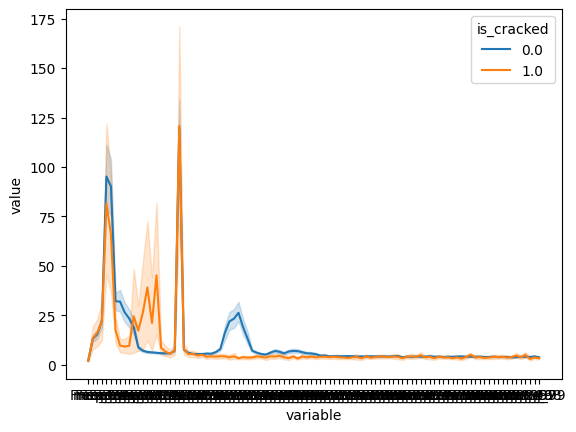

In [94]:
# plot the frequencies grouped by cracked status

sns.lineplot(x="variable", y="value", hue="is_cracked", data=df_melted)


In [101]:
y = df['is_cracked']  # Target variable
# X = df.drop(['Type','EGK'], axis=1)
# Berücksichtige die Frequenzen als Features
freq_cols = [col for col in df.columns if col.startswith('Freq_')]
X = df[['mean', 'std', 'min', 'max'] + freq_cols]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,mean,std,min,max,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,...,Freq_90,Freq_91,Freq_92,Freq_93,Freq_94,Freq_95,Freq_96,Freq_97,Freq_98,Freq_99
63,-0.005135,1.692475,-4.183455,4.335705,10.959229,15.137555,29.608057,427.910577,113.693512,53.992465,...,6.723523,4.551496,6.904213,3.730595,5.963511,2.259045,4.783116,4.562909,2.412982,7.797198
17,0.067425,1.118033,-2.730456,2.491927,32.991643,45.750727,62.646420,172.183917,235.193055,59.023416,...,5.034643,4.055822,5.492594,4.987869,1.132576,9.799026,0.960795,3.938026,4.307080,4.026381
215,0.002529,0.161150,-0.689165,0.612596,2.215202,4.745720,5.005566,3.921121,4.563934,2.281540,...,6.859702,4.107358,7.876814,2.456633,4.051204,2.322295,2.431709,1.196063,2.558686,5.232276
219,0.015419,1.364314,-2.973846,3.129681,5.997908,12.098258,22.378629,42.200205,228.868306,30.217037,...,3.680212,3.498900,1.598507,3.809163,3.990712,1.970098,2.566294,2.638176,1.343379,1.343627
183,-0.004312,0.192934,-0.795393,0.687434,5.313892,2.890097,4.083930,6.997837,8.458750,4.280442,...,2.847018,4.349959,2.142841,3.312684,3.671142,1.825353,1.741695,6.892986,1.166939,6.365486


In [127]:
import numpy as np
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

model.coef_

array([[-0.0049775 , -0.00362915, -0.00762284,  0.00130122, -0.10882312,
        -0.05002592, -0.21363354, -0.00749001, -0.00246378, -0.1385338 ,
        -0.17298416,  0.02365011, -0.27263584,  0.02621067,  0.14494153,
         0.06958013,  0.24648409,  0.04562968,  0.21465632, -0.30679536,
         0.22673545, -0.13173592,  0.00705944,  0.00466195, -0.02014908,
        -0.34871892,  0.05750394, -0.35709329,  0.10997956, -0.64311303,
         0.19770882,  0.01386904,  0.40136863, -0.13795606, -0.56873169,
        -0.02567011,  0.18508775, -0.0944639 ,  0.02388551,  0.25530453,
         0.02001961, -0.07732667, -0.68486555,  0.09496562, -0.34431429,
         0.08291703,  0.05952879, -0.18372001,  0.10029204,  0.24806715,
         0.23388185, -0.02327249,  0.21614025,  0.10619926,  0.25781341,
        -0.50994209, -0.15518936, -0.04600375, -0.22722417,  0.24347946,
        -0.13458702, -0.23613774, -0.28111697, -0.276341  , -0.14806459,
         0.38766698,  0.30742168,  0.30821069,  0.1

In [128]:
y_pred = model.predict(X_train)

y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [129]:
df_result = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df_result.merge(X_train, left_index=True, right_index=True)

df_result


,Actual,Predicted
63,0.0,0.0
17,0.0,0.0
215,0.0,0.0
219,0.0,0.0
183,0.0,0.0
...,...,...
188,0.0,0.0
71,0.0,0.0
106,0.0,0.0
270,0.0,0.0


In [130]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_pred)

array([[217,   0],
       [  0,  19]])

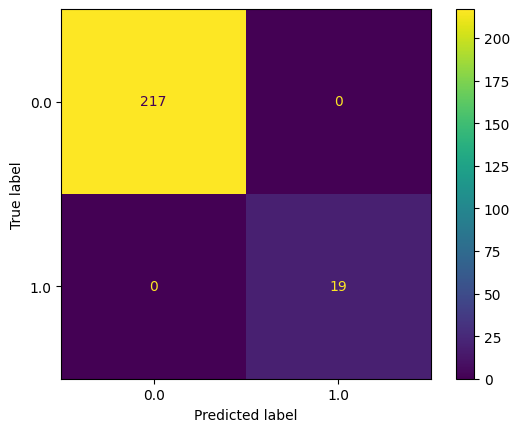

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()


In [132]:
# Weitere Fehlermetriken

from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       217
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



array([[53,  1],
       [ 4,  2]])

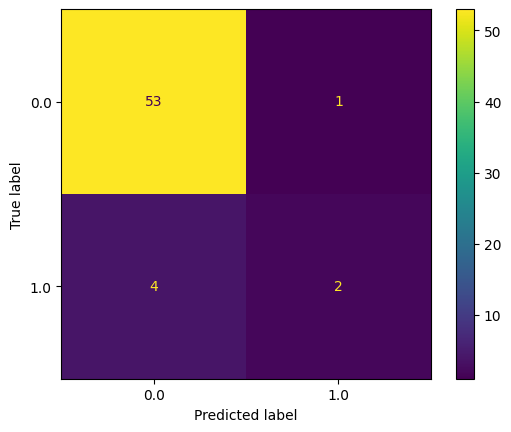

In [133]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

cm

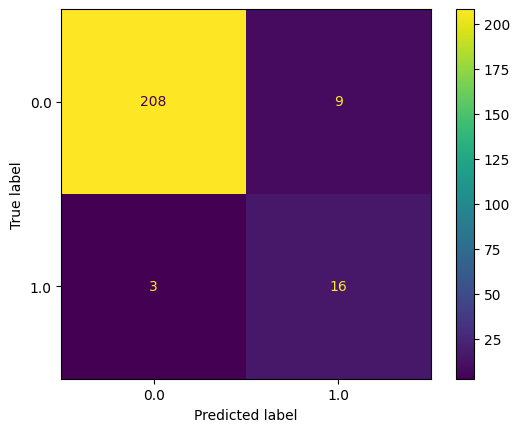

In [135]:
# Import knn
from sklearn.neighbors import KNeighborsClassifier

# Define the model with the number of neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

In [136]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       217
         1.0       0.64      0.84      0.73        19

    accuracy                           0.95       236
   macro avg       0.81      0.90      0.85       236
weighted avg       0.96      0.95      0.95       236



In [137]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        54
         1.0       0.67      0.33      0.44         6

    accuracy                           0.92        60
   macro avg       0.80      0.66      0.70        60
weighted avg       0.90      0.92      0.90        60



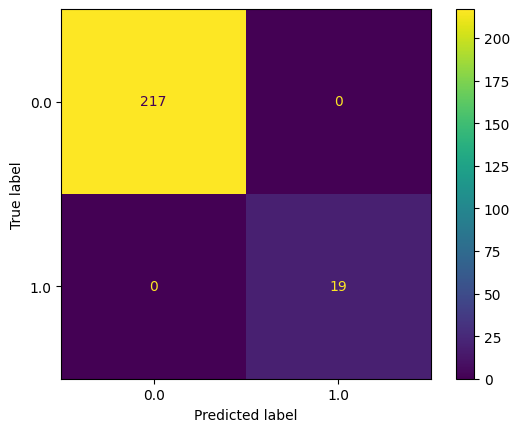

In [138]:
### Decision Tree

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

In [139]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       217
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        54
         1.0       0.50      0.50      0.50         6

    accuracy                           0.90        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.90      0.90      0.90        60



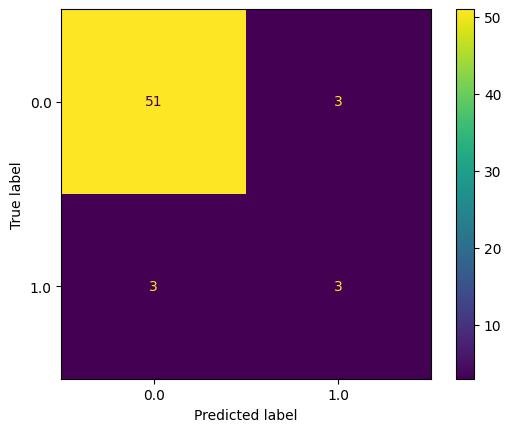

In [140]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

print(classification_report(y_test, y_pred))


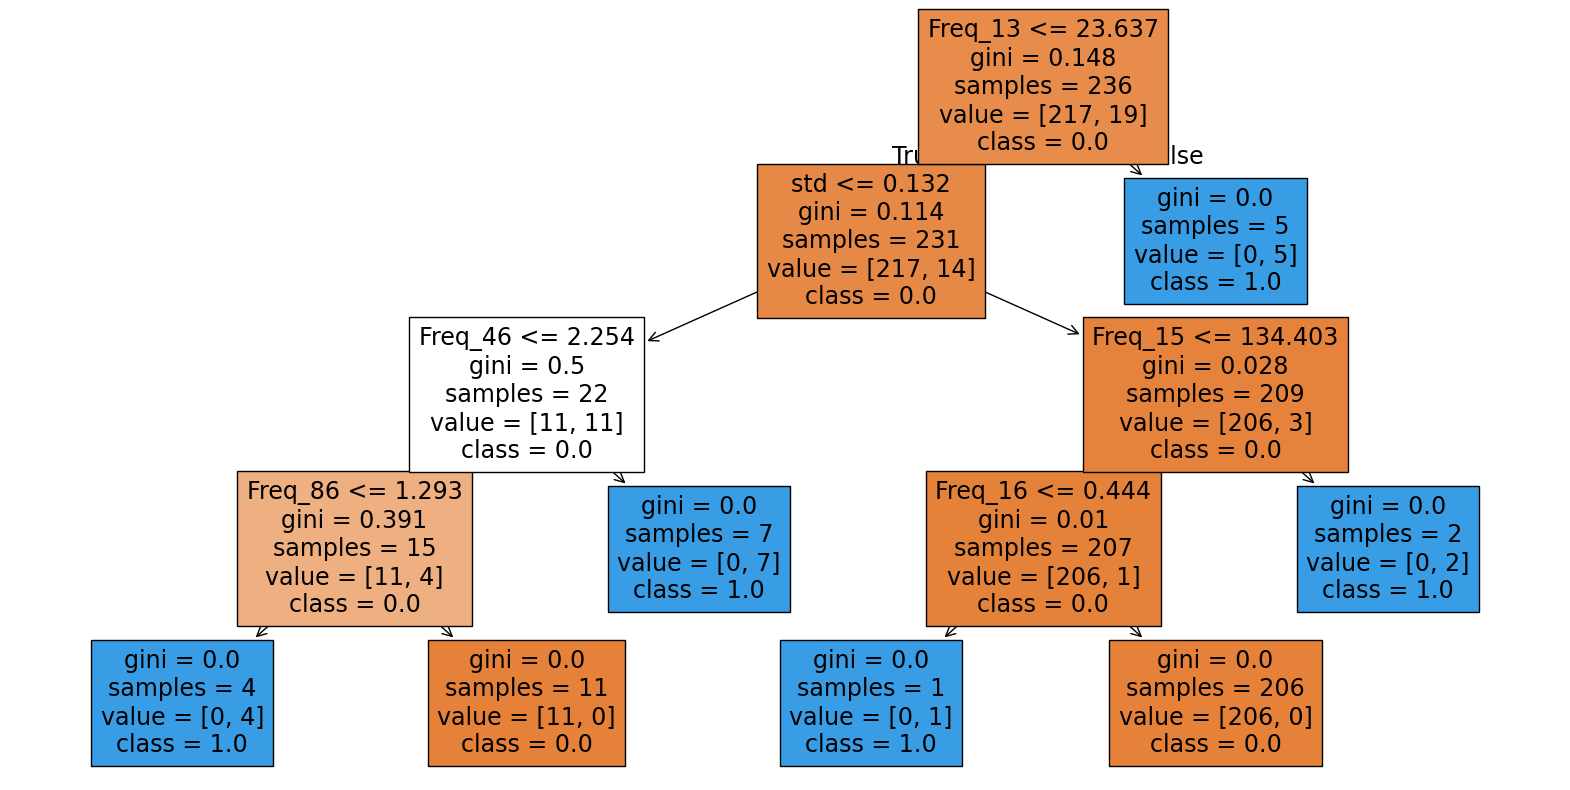

In [141]:
# Plot the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
	model,
	filled=True,
	feature_names=X.columns,
	class_names=[str(cls) for cls in model.classes_]
)
plt.show()

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       217
         1.0       1.00      0.26      0.42        19

    accuracy                           0.94       236
   macro avg       0.97      0.63      0.69       236
weighted avg       0.94      0.94      0.92       236



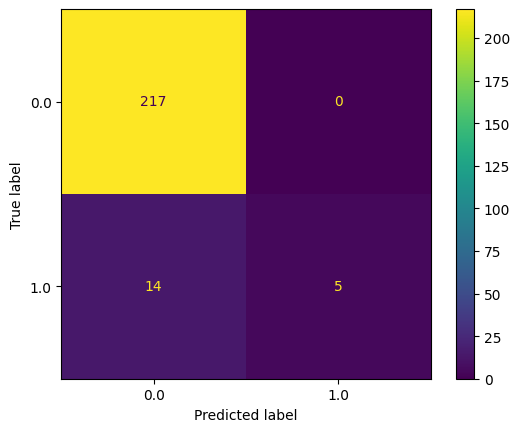

In [142]:
# Define a decision tree with a maximum depth of 2

model = DecisionTreeClassifier(max_depth=2)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

print(classification_report(y_train, y_pred))

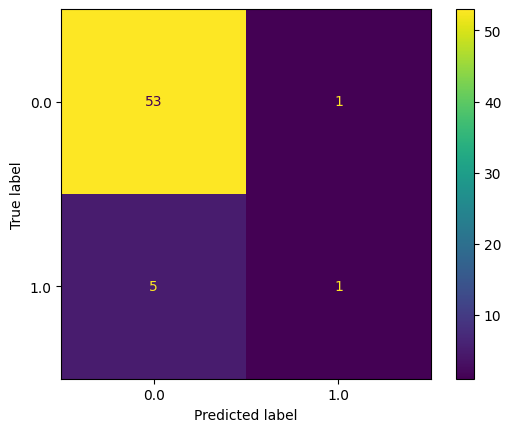

In [143]:
# Test Set

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

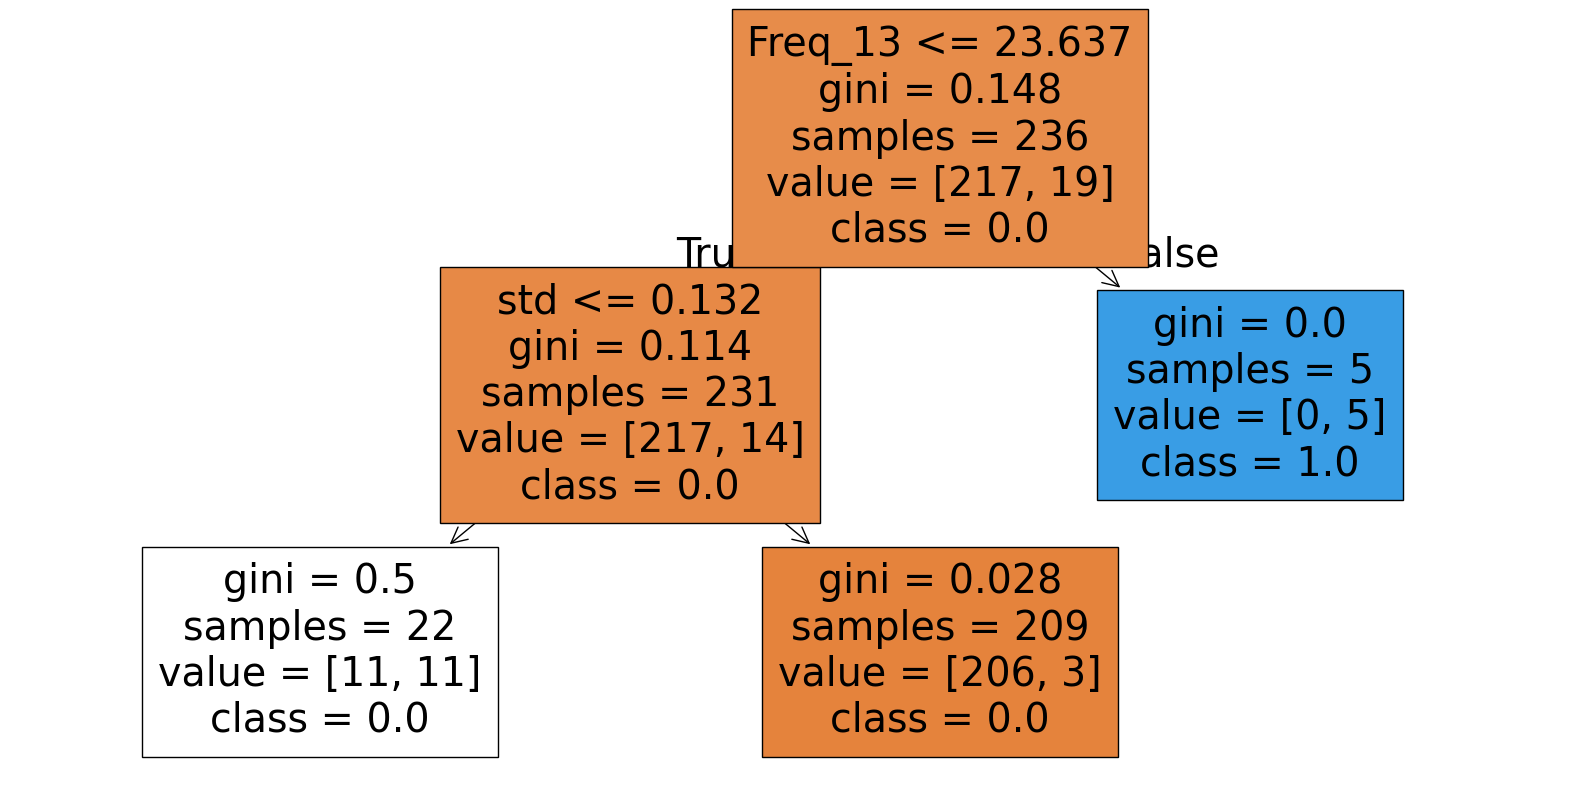

In [144]:
# Plot the decision tree

plt.figure(figsize=(20,10))

tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in model.classes_])

plt.show()
